<a href="https://colab.research.google.com/github/jminango20/DataCleaning/blob/master/Parsing_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parsing Dates
Help Python recognize dates as composed of day, month, and year

In this notebook, we're going to work with dates.

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#read in our data
landslides = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataCleaning/catalog.csv')

## Check the data type of our date column

We begin by taking a look at the first five rows of the data.

In [4]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


We'll be working with the "date" column from the `landslides dataframe`. 

Let's make sure it actually looks like it contains dates

In [6]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Notice that at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

In [7]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

## Convert our date columns to datetime

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called **"parsing dates"** because we're taking in a string and identifying its component parts.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. 

There are lots of possible parts of a date, but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

**Some examples:**

* 1/17/07 has the format "%m/%d/%y"
* 17-1-2007 has the format "%d-%m-%Y"

Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [9]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is datetime64. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [11]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

## Other alternative


In [13]:
landslides['date_parsed_new'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

In [14]:
landslides['date_parsed_new'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed_new, dtype: datetime64[ns]

## Select the day of the month
Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [15]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [16]:
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## Plot the day of the month to check the date parsing

In [17]:
#remove na's
day_of_month_landslides.dropna()

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1690, dtype: float64

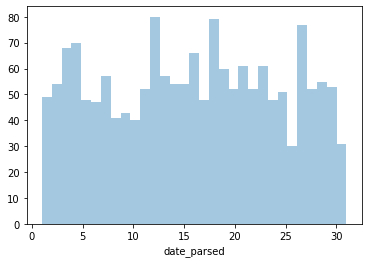

In [22]:
#plot the day of the month
sns.distplot(day_of_month_landslides,kde=False,bins=31)

In [ ]:
pd.to_datetime()